In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("Mall_Customers.csv") #read the file

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:,[3,4]].values #iloc is integer location to select the row and column indices from pandas and dot values are called from pandas and return numpy array.

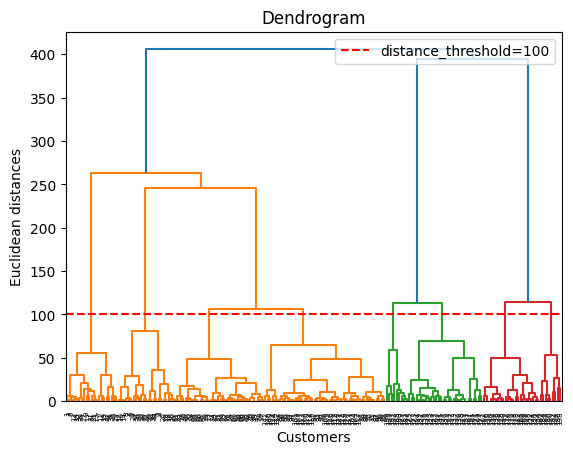

In [5]:
#Dendrogram graph

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram((sch.linkage(X, method='ward',metric='euclidean')),show_leaf_counts=True) #method have ward, single, complete, centroid and may more.
#metric has eucliedean, cityblock(manhattan), 'cosine'. Refer linkage here ->http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

plt.axhline(y=100, color='r', linestyle='--', label='distance_threshold=100')
plt.legend()

plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering

#Either of n_clusters or distance_threshold should be None. 
#metric is used to compute the linkage(i.e distance)

clustModel = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward', distance_threshold=None) 
agglo = clustModel.fit_predict(X) #train and test the model

In [8]:
agglo

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [9]:
supervised = dataset #assign dataframe dataset value to supervised variable

In [10]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
supervised["Cluster group"] = agglo #created a column called "cluster group" in the supervised dataset and assign the predicted values

In [12]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [13]:
supervised.to_csv("agglo_cluster.csv", index=False) #created a csv file with supervised data

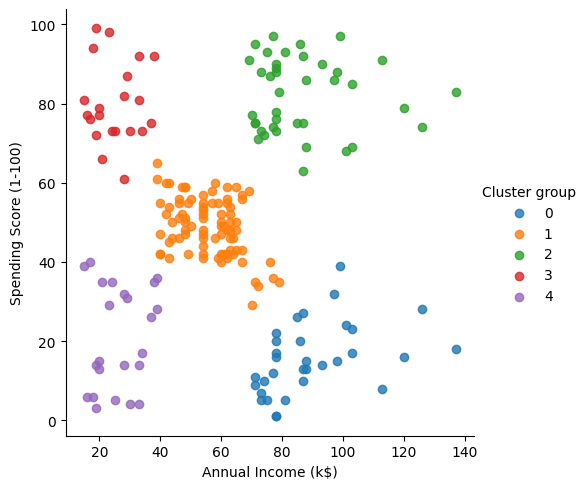

In [14]:
import seaborn as sns

facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True)